In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# Take the CSV files as a pandas frame
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
print(df.shape)
df.head()

(149, 5)


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [48]:
#Give the names to the 
Columns_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
Data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=Columns_names)
Data.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


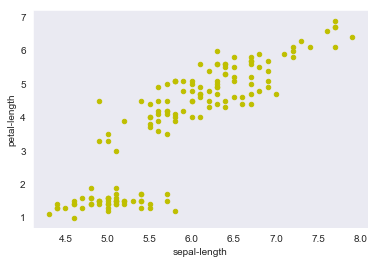

In [37]:
#Data visualizaion
  
Data.plot(kind ="scatter",
          color ="y",
          x ='sepal-length', 
          y ='petal-length',) 
plt.grid() 

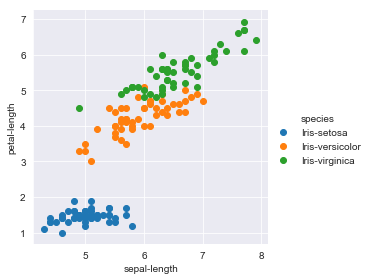

In [38]:
import seaborn as sns 
#print (Data.columns)
sns.set_style("darkgrid") 
# hue stores the class/label of iris dataset.
sns.FacetGrid(Data, hue ="species",  
              height = 4).map(plt.scatter,  
                              'sepal-length',  
                              'petal-length').add_legend() 

In [49]:
#data processing
dataset=Data
#iloc function is used to seperate the columns.
X = dataset.iloc[:, :-1].values #train set except last column because last column is labels
y = dataset.iloc[:, 4].values  #first four featur columns
# Devide the data into train(80%) and test(20%) sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)
print("Xtrain",Xtrain.shape)
print("ytrain",ytrain.shape)
print("Xtest",Xtest.shape)
print("ytest",ytest.shape)

Xtrain (120, 4)
ytrain (120,)
Xtest (30, 4)
ytest (30,)


In [50]:
#___Normalize the dataset features
#______________Normalize the Train data______________
mu = np.mean(Xtrain, axis=0)#mean
std = np.std(Xtrain)#Standard Deviation
Xtrain = (Xtrain - mu) / std

#________________________Normalize the Test data________
mu = np.mean(Xtest, axis=0)
std = np.std(Xtest)
Xtest = (Xtest - mu) / std

print(Xtrain[0:10])
print(Xtest[0:10])

[[ 1.04553454  0.36646301  1.35014903  0.41611013]
 [ 0.2882057   0.06353148  0.39086583  0.16366718]
 [ 0.69211442  0.26548583  1.19868326  0.66855307]
 [ 0.13673993 -0.13842288  0.49184301  0.01220141]
 [ 0.13673993 -0.13842288  0.13842288  0.06269   ]
 [ 0.94455736 -0.23940006  1.60259198  0.56757589]
 [-0.77205468 -0.0374457  -1.32574622 -0.54317308]
 [ 0.23771711 -0.28988865  0.64330878  0.36562154]
 [ 0.08625134 -0.18891147  0.69379737  0.21415577]
 [ 0.08625134 -0.08793429  0.39086583  0.16366718]]
[[-0.10275359 -0.08905311  0.31339844  0.00513768]
 [-0.05137679 -0.1404299   0.62165919  0.31339844]
 [-0.05137679  0.52746841 -1.38203573 -0.56000704]
 [ 0.20550717 -0.34593707  0.26202164  0.00513768]
 [-0.30826076  0.37333803 -1.22790535 -0.56000704]
 [-0.20550717 -0.19180669  0.26202164 -0.04623911]
 [ 0.20550717  0.16783086  1.08405033  0.62165919]
 [ 0.92478227  0.01370048  1.13542712  0.51890561]
 [-0.05137679 -0.08905311  0.62165919  0.5702824 ]
 [-0.66789831  0.06507727 -1.2

In [51]:
#______________KNN Classifier_______________
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Knnclf = KNeighborsClassifier(n_neighbors=8)
Knnclf.fit(Xtrain, ytrain)

Pred = Knnclf.predict(Xtest)

Matrix = confusion_matrix(ytest, Pred)
print("ConfusionMatrix:")
print(Matrix)
print("Classification Report:")
report = classification_report(ytest, Pred)
print (report)
print("Accuracy in percent: %.2f" %((accuracy_score(Pred,ytest)) * 100))

ConfusionMatrix:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy in percent: 96.67


In [53]:
#_________________Hyperparameter tuning using Grid Serach for KNN_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'n_neighbors': np.arange(1,10,1), 'p':[1,2] }]
gridknn= GridSearchCV(Knnclf, tuned_parameters, cv=5)
gridknn.fit(Xtrain, np.ravel(ytrain))
print("Best estimatorss",gridknn.best_estimator_)
print("Best parametrs",gridknn.best_params_)


#__________________Cross validation for KNN_______________
from sklearn.model_selection import cross_val_score
knnclf = KNeighborsClassifier(n_neighbors=gridknn.best_params_['n_neighbors'], p=gridknn.best_params_['p'])
scores = cross_val_score(knnclf, Xtrain, np.ravel(ytrain), cv=5)
print(scores)
PredictedOutcome = gridknn.predict(Xtest)
print(confusion_matrix(ytest,PredictedOutcome))
print(classification_report(ytest,PredictedOutcome))

Best estimatorss KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')
Best parametrs {'n_neighbors': 5, 'p': 1}
[0.96       0.95833333 1.         1.         1.        ]
[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\veena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier()
DTclf.fit(Xtrain, ytrain)

Pred = DTclf.predict(Xtest)

Matrix = confusion_matrix(ytest, Pred)
print("ConfusionMatrix:")
print(Matrix)
print("Classification Report:")
report = classification_report(ytest, Pred)
print (report)
print("Accuracy in percent: %.2f" %((accuracy_score(Pred,ytest)) * 100))

ConfusionMatrix:
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.91      1.00      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy in percent: 96.67


In [54]:
#_________________Hyperparameter tuning using Grid Serach for Decision Tree_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'max_depth': np.arange(1,50)}]
param_dist = {'max_depth':np.arange(5,100,5)#, 'min_samples_split': np.arange(0.1, 1.0, 0.10), 'min_samples_leaf': np.arange(0.1, 0.5, 0.1)
              , 'criterion':['gini', 'entropy']}
clf= GridSearchCV(DTclf, param_dist, cv=5)
clf.fit(Xtrain, np.ravel(ytrain))
print(clf.best_params_)


#__________________Cross validation for Decision Tree_______________
from sklearn.model_selection import cross_val_score
dtclf = DecisionTreeClassifier(max_depth=clf.best_params_['max_depth'])
scores = cross_val_score(dtclf, Xtrain, np.ravel(ytrain), cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

PredictedOutcome = clf.predict(Xtest)
print(confusion_matrix(ytest,PredictedOutcome))
print(classification_report(ytest,PredictedOutcome))



{'criterion': 'gini', 'max_depth': 35}
[0.96       0.95833333 0.91666667 0.91666667 0.95652174]
Accuracy: 0.94 (+/- 0.02)
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.91      1.00      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\veena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
# SVM Model
from sklearn.svm import SVC
SVCLF = SVC()
print(SVCLF.get_params())
SVCLF.fit(Xtrain, ytrain)

Pred =SVCLF.predict(Xtest)

Matrix = confusion_matrix(ytest, Pred)
print("ConfusionMatrix:")
print(Matrix)
print("Classification Report:")
report = classification_report(ytest, Pred)
print (report)
print("Accuracy in percent: %.2f" %((accuracy_score(Pred,ytest)) * 100))

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
ConfusionMatrix:
[[ 9  0  0]
 [ 0 11  0]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy in percent: 96.67


C:\Users\veena\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
#_________________Hyperparameter tuning using Grid Serach for SVM_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'kernel': ['linear'], 'C': np.arange(1,1000,1)}]
param_dist = {'C': np.arange(0.2, 2, 0.20), 'gamma': np.arange(0.001,0.01,0.001),'kernel': ['rbf', 'poly', 'sigmoid']}
clf= GridSearchCV(SVCLF, param_dist, cv=5)
clf.fit(Xtrain, np.ravel(ytrain))
print(clf.best_params_)

#__________________Cross validation for SVM_______________
from sklearn.model_selection import cross_val_score
svclf = SVC(kernel=clf.best_params_['kernel'], C=clf.best_params_['C'], gamma=clf.best_params_['gamma'])

scores = cross_val_score(svclf, Xtrain, np.ravel(ytrain), cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

PredictedOutcome = clf.predict(Xtest)
print(confusion_matrix(ytest,PredictedOutcome))
print(classification_report(ytest,PredictedOutcome))


{'C': 1.8, 'gamma': 0.009000000000000001, 'kernel': 'rbf'}
[0.96       0.91666667 1.         0.875      0.95652174]
Accuracy: 0.94 (+/- 0.08)
[[ 9  0  0]
 [ 0 10  1]
 [ 0  3  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.77      0.91      0.83        11
 Iris-virginica       0.88      0.70      0.78        10

      micro avg       0.87      0.87      0.87        30
      macro avg       0.88      0.87      0.87        30
   weighted avg       0.87      0.87      0.86        30



C:\Users\veena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
#Multilayer Perceptron
from sklearn.neural_network import MLPClassifier
MLPCLF = MLPClassifier(alpha=1, max_iter=2000, early_stopping = True)
print(MLPCLF.get_params())
MLPCLF.fit(Xtrain, ytrain)

Pred =MLPCLF.predict(Xtest)

Matrix = confusion_matrix(ytest, Pred)
print("ConfusionMatrix:")
print(Matrix)
print("Classification Report:")
report = classification_report(ytest, Pred)
print (report)
print("Accuracy in percent: %.2f" %((accuracy_score(Pred,ytest)) * 100))


{'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 2000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
ConfusionMatrix:
[[10  0  0]
 [ 2  9  0]
 [ 0  5  4]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.83      1.00      0.91        10
Iris-versicolor       0.64      0.82      0.72        11
 Iris-virginica       1.00      0.44      0.62         9

      micro avg       0.77      0.77      0.77        30
      macro avg       0.83      0.75      0.75        30
   weighted avg       0.81      0.77      0.75        30

Accuracy in percent: 76.67


In [15]:
#_________________Hyperparameter tuning using Grid Serach for MLP_______________
from sklearn.model_selection import GridSearchCV
tuned_parameters =[{'alpha': np.arange(0.01,5,1), 'max_iter':[1000,2000] }]
param_dist = {'verbose':[True], 'early_stopping':[True],'alpha':np.arange(0.0002,0.001,0.0002), 'hidden_layer_sizes':[(30,30,30),(50,50,50),(70,70,70)], 'learning_rate':['invscaling', 'adaptive'], 'learning_rate_init':[0.001,0.01,0.1],'max_iter':np.arange(1000,2000,1000)}
clf= GridSearchCV(MLPCLF, param_dist, cv=5)
clf.fit(Xtrain, np.ravel(ytrain))
#print(clf.best_params_)


#__________________Cross validation for MLP_______________
from sklearn.model_selection import cross_val_score
mlpclf = MLPClassifier(alpha=clf.best_params_['alpha'], max_iter=clf.best_params_['max_iter'])
scores = cross_val_score(mlpclf, Xtrain, np.ravel(ytrain), cv=5)
#print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

PredictedOutcome = clf.predict(Xtest)
print(confusion_matrix(ytest,PredictedOutcome))
print(classification_report(ytest,PredictedOutcome))

Iteration 1, loss = 1.17112705
Validation score: 0.400000
Iteration 2, loss = 1.15806447
Validation score: 0.400000
Iteration 3, loss = 1.14545040
Validation score: 0.400000
Iteration 4, loss = 1.13314251
Validation score: 0.400000
Iteration 5, loss = 1.12109189
Validation score: 0.400000
Iteration 6, loss = 1.10917714
Validation score: 0.400000
Iteration 7, loss = 1.09737767
Validation score: 0.400000
Iteration 8, loss = 1.08569667
Validation score: 0.400000
Iteration 9, loss = 1.07425571
Validation score: 0.400000
Iteration 10, loss = 1.06306637
Validation score: 0.400000
Iteration 11, loss = 1.05207219
Validation score: 0.400000
Iteration 12, loss = 1.04124352
Validation score: 0.400000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.19838916
Validation score: 0.500000
Iteration 2, loss = 1.18647597
Validation score: 0.500000
Iteration 3, loss = 1.17476912
Validation score: 0.500000
Iteration 4, loss = 1.16335660
Val

Iteration 5, loss = 0.85842180
Validation score: 0.600000
Iteration 6, loss = 0.77448290
Validation score: 0.600000
Iteration 7, loss = 0.69223136
Validation score: 0.500000
Iteration 8, loss = 0.61367999
Validation score: 0.500000
Iteration 9, loss = 0.54090359
Validation score: 0.500000
Iteration 10, loss = 0.47387969
Validation score: 0.500000
Iteration 11, loss = 0.41182128
Validation score: 0.600000
Iteration 12, loss = 0.35543116
Validation score: 0.700000
Iteration 13, loss = 0.30828086
Validation score: 0.700000
Iteration 14, loss = 0.27195666
Validation score: 0.700000
Iteration 15, loss = 0.23979747
Validation score: 0.700000
Iteration 16, loss = 0.21053088
Validation score: 0.700000
Iteration 17, loss = 0.18662034
Validation score: 0.700000
Iteration 18, loss = 0.16490329
Validation score: 0.700000
Iteration 19, loss = 0.14438535
Validation score: 0.800000
Iteration 20, loss = 0.12763764
Validation score: 0.800000
Iteration 21, loss = 0.11185845
Validation score: 0.800000
It

Validation score: 0.400000
Iteration 9, loss = 1.06782509
Validation score: 0.400000
Iteration 10, loss = 1.05991486
Validation score: 0.400000
Iteration 11, loss = 1.05216146
Validation score: 0.400000
Iteration 12, loss = 1.04451951
Validation score: 0.400000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.04976082
Validation score: 0.500000
Iteration 2, loss = 1.03600331
Validation score: 0.500000
Iteration 3, loss = 1.02249259
Validation score: 0.500000
Iteration 4, loss = 1.00910563
Validation score: 0.500000
Iteration 5, loss = 0.99600223
Validation score: 0.600000
Iteration 6, loss = 0.98299519
Validation score: 0.700000
Iteration 7, loss = 0.97015548
Validation score: 0.800000
Iteration 8, loss = 0.95744793
Validation score: 0.800000
Iteration 9, loss = 0.94483975
Validation score: 0.800000
Iteration 10, loss = 0.93233573
Validation score: 0.800000
Iteration 11, loss = 0.91989165
Validation score: 0.800000
Itera

Iteration 15, loss = 0.37790495
Validation score: 0.900000
Iteration 16, loss = 0.33143021
Validation score: 0.900000
Iteration 17, loss = 0.28999832
Validation score: 0.900000
Iteration 18, loss = 0.25480369
Validation score: 0.800000
Iteration 19, loss = 0.22474169
Validation score: 0.800000
Iteration 20, loss = 0.19884488
Validation score: 0.800000
Iteration 21, loss = 0.17594424
Validation score: 0.900000
Iteration 22, loss = 0.15575724
Validation score: 0.900000
Iteration 23, loss = 0.13884485
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.17162276
Validation score: 0.700000
Iteration 2, loss = 0.72747659
Validation score: 0.800000
Iteration 3, loss = 0.43095624
Validation score: 0.700000
Iteration 4, loss = 0.86945395
Validation score: 0.700000
Iteration 5, loss = 0.39420744
Validation score: 0.800000
Iteration 6, loss = 0.32703283
Validation score: 0.800000
Iteration 7, loss = 0.253275

Iteration 37, loss = 0.67569640
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.15242242
Validation score: 0.300000
Iteration 2, loss = 1.12018177
Validation score: 0.300000
Iteration 3, loss = 1.09001529
Validation score: 0.300000
Iteration 4, loss = 1.06198622
Validation score: 0.300000
Iteration 5, loss = 1.03594174
Validation score: 0.300000
Iteration 6, loss = 1.01160830
Validation score: 0.400000
Iteration 7, loss = 0.98879865
Validation score: 0.800000
Iteration 8, loss = 0.96731240
Validation score: 0.900000
Iteration 9, loss = 0.94698445
Validation score: 0.900000
Iteration 10, loss = 0.92790331
Validation score: 0.900000
Iteration 11, loss = 0.91002766
Validation score: 0.900000
Iteration 12, loss = 0.89365703
Validation score: 1.000000
Iteration 13, loss = 0.87889483
Validation score: 1.000000
Iteration 14, loss = 0.86599354
Validation score: 1.000000
Iteration 15, loss = 0.85375185

Iteration 12, loss = 0.32714431
Validation score: 0.800000
Iteration 13, loss = 0.29588182
Validation score: 1.000000
Iteration 14, loss = 0.20170629
Validation score: 1.000000
Iteration 15, loss = 0.21243006
Validation score: 1.000000
Iteration 16, loss = 0.16061527
Validation score: 0.900000
Iteration 17, loss = 0.29838354
Validation score: 1.000000
Iteration 18, loss = 0.12561785
Validation score: 1.000000
Iteration 19, loss = 0.12198188
Validation score: 1.000000
Iteration 20, loss = 0.09053407
Validation score: 1.000000
Iteration 21, loss = 0.07701053
Validation score: 1.000000
Iteration 22, loss = 0.04670653
Validation score: 1.000000
Iteration 23, loss = 0.04410372
Validation score: 1.000000
Iteration 24, loss = 0.03216234
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.06404198
Validation score: 0.600000
Iteration 2, loss = 0.76467273
Validation score: 0.700000
Iteration 3, loss = 1.58

Validation score: 0.500000
Iteration 3, loss = 1.06556939
Validation score: 0.500000
Iteration 4, loss = 1.05061471
Validation score: 0.600000
Iteration 5, loss = 1.03563584
Validation score: 0.700000
Iteration 6, loss = 1.02067729
Validation score: 0.700000
Iteration 7, loss = 1.00575053
Validation score: 0.800000
Iteration 8, loss = 0.99078256
Validation score: 0.800000
Iteration 9, loss = 0.97573453
Validation score: 0.800000
Iteration 10, loss = 0.96052255
Validation score: 0.800000
Iteration 11, loss = 0.94515564
Validation score: 0.800000
Iteration 12, loss = 0.92950877
Validation score: 0.800000
Iteration 13, loss = 0.91368542
Validation score: 0.800000
Iteration 14, loss = 0.89772159
Validation score: 0.800000
Iteration 15, loss = 0.88153011
Validation score: 0.800000
Iteration 16, loss = 0.86510776
Validation score: 0.800000
Iteration 17, loss = 0.84844366
Validation score: 0.800000
Iteration 18, loss = 0.83148530
Validation score: 0.700000
Validation score did not improve mor

Iteration 13, loss = 0.37421385
Validation score: 0.900000
Iteration 14, loss = 0.35264375
Validation score: 1.000000
Iteration 15, loss = 0.31172143
Validation score: 1.000000
Iteration 16, loss = 0.26198978
Validation score: 1.000000
Iteration 17, loss = 0.21861810
Validation score: 1.000000
Iteration 18, loss = 0.18602006
Validation score: 1.000000
Iteration 19, loss = 0.15857406
Validation score: 1.000000
Iteration 20, loss = 0.13887956
Validation score: 1.000000
Iteration 21, loss = 0.12588240
Validation score: 1.000000
Iteration 22, loss = 0.10797941
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.13616585
Validation score: 0.400000
Iteration 2, loss = 1.49306599
Validation score: 0.600000
Iteration 3, loss = 0.75387322
Validation score: 0.600000
Iteration 4, loss = 0.59678654
Validation score: 0.600000
Iteration 5, loss = 0.46380368
Validation score: 0.600000
Iteration 6, loss = 0.33745

Iteration 1, loss = 1.17892772
Validation score: 0.100000
Iteration 2, loss = 1.14360365
Validation score: 0.100000
Iteration 3, loss = 1.11154059
Validation score: 0.100000
Iteration 4, loss = 1.08185444
Validation score: 0.100000
Iteration 5, loss = 1.05372079
Validation score: 0.100000
Iteration 6, loss = 1.02686327
Validation score: 0.100000
Iteration 7, loss = 1.00118106
Validation score: 0.100000
Iteration 8, loss = 0.97667986
Validation score: 0.100000
Iteration 9, loss = 0.95344221
Validation score: 0.100000
Iteration 10, loss = 0.93190232
Validation score: 0.100000
Iteration 11, loss = 0.91126790
Validation score: 0.500000
Iteration 12, loss = 0.89123441
Validation score: 0.600000
Iteration 13, loss = 0.87162995
Validation score: 0.600000
Iteration 14, loss = 0.85227301
Validation score: 0.700000
Iteration 15, loss = 0.83310613
Validation score: 0.700000
Iteration 16, loss = 0.81415297
Validation score: 0.700000
Iteration 17, loss = 0.79535063
Validation score: 0.700000
Iterat

Validation score: 1.000000
Iteration 11, loss = 0.12407045
Validation score: 1.000000
Iteration 12, loss = 0.10923187
Validation score: 1.000000
Iteration 13, loss = 0.09496905
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.10044329
Validation score: 0.900000
Iteration 2, loss = 0.84038793
Validation score: 0.900000
Iteration 3, loss = 0.67927992
Validation score: 0.900000
Iteration 4, loss = 0.56871958
Validation score: 0.900000
Iteration 5, loss = 0.48027553
Validation score: 0.900000
Iteration 6, loss = 0.40669528
Validation score: 1.000000
Iteration 7, loss = 0.34307636
Validation score: 1.000000
Iteration 8, loss = 0.29129687
Validation score: 1.000000
Iteration 9, loss = 0.24575429
Validation score: 1.000000
Iteration 10, loss = 0.20230169
Validation score: 1.000000
Iteration 11, loss = 0.16874470
Validation score: 1.000000
Iteration 12, loss = 0.13980736
Validation score: 0.900000
Iter

Iteration 22, loss = 0.01660919
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.13141340
Validation score: 0.400000
Iteration 2, loss = 1.10088623
Validation score: 0.700000
Iteration 3, loss = 1.07195645
Validation score: 0.700000
Iteration 4, loss = 1.04399191
Validation score: 0.700000
Iteration 5, loss = 1.01679659
Validation score: 0.700000
Iteration 6, loss = 0.99036644
Validation score: 0.700000
Iteration 7, loss = 0.96439792
Validation score: 0.700000
Iteration 8, loss = 0.93919030
Validation score: 0.700000
Iteration 9, loss = 0.91481826
Validation score: 0.800000
Iteration 10, loss = 0.89080708
Validation score: 0.900000
Iteration 11, loss = 0.86765756
Validation score: 0.900000
Iteration 12, loss = 0.84523701
Validation score: 0.800000
Iteration 13, loss = 0.82325428
Validation score: 0.800000
Iteration 14, loss = 0.80171071
Validation score: 0.800000
Iteration 15, loss = 0.78042668

Iteration 15, loss = 0.08603498
Validation score: 1.000000
Iteration 16, loss = 0.07694616
Validation score: 0.900000
Iteration 17, loss = 0.06525497
Validation score: 0.900000
Iteration 18, loss = 0.06200922
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.10340528
Validation score: 0.700000
Iteration 2, loss = 0.87541760
Validation score: 0.600000
Iteration 3, loss = 0.73114750
Validation score: 0.600000
Iteration 4, loss = 0.60022506
Validation score: 0.600000
Iteration 5, loss = 0.49598101
Validation score: 0.600000
Iteration 6, loss = 0.40316767
Validation score: 0.700000
Iteration 7, loss = 0.31500297
Validation score: 0.900000
Iteration 8, loss = 0.25071433
Validation score: 0.900000
Iteration 9, loss = 0.20380457
Validation score: 0.900000
Iteration 10, loss = 0.15392955
Validation score: 0.900000
Iteration 11, loss = 0.12839709
Validation score: 0.900000
Iteration 12, loss = 0.10232155

Iteration 21, loss = 0.08028352
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.09178779
Validation score: 0.800000
Iteration 2, loss = 1.52274371
Validation score: 0.700000
Iteration 3, loss = 2.64404282
Validation score: 0.700000
Iteration 4, loss = 0.75150911
Validation score: 0.700000
Iteration 5, loss = 0.66785522
Validation score: 0.900000
Iteration 6, loss = 0.58297870
Validation score: 0.800000
Iteration 7, loss = 0.53589543
Validation score: 0.900000
Iteration 8, loss = 0.41184438
Validation score: 0.800000
Iteration 9, loss = 0.37625016
Validation score: 1.000000
Iteration 10, loss = 0.25853553
Validation score: 1.000000
Iteration 11, loss = 0.21951130
Validation score: 0.900000
Iteration 12, loss = 0.14961246
Validation score: 0.900000
Iteration 13, loss = 0.11860478
Validation score: 0.900000
Iteration 14, loss = 0.11131354
Validation score: 0.900000
Iteration 15, loss = 0.10164347

Iteration 1, loss = 1.15844744
Validation score: 0.600000
Iteration 2, loss = 1.06562231
Validation score: 0.600000
Iteration 3, loss = 0.97542888
Validation score: 0.800000
Iteration 4, loss = 0.88650270
Validation score: 0.800000
Iteration 5, loss = 0.79870534
Validation score: 0.600000
Iteration 6, loss = 0.71919261
Validation score: 0.500000
Iteration 7, loss = 0.65059723
Validation score: 0.500000
Iteration 8, loss = 0.59229060
Validation score: 0.500000
Iteration 9, loss = 0.54333614
Validation score: 0.500000
Iteration 10, loss = 0.50266988
Validation score: 0.700000
Iteration 11, loss = 0.46631333
Validation score: 0.700000
Iteration 12, loss = 0.43085313
Validation score: 0.800000
Iteration 13, loss = 0.39713753
Validation score: 0.900000
Iteration 14, loss = 0.36530158
Validation score: 0.900000
Iteration 15, loss = 0.33791855
Validation score: 1.000000
Iteration 16, loss = 0.31387935
Validation score: 1.000000
Iteration 17, loss = 0.29436785
Validation score: 1.000000
Iterat

Iteration 4, loss = 0.33958187
Validation score: 1.000000
Iteration 5, loss = 0.57679401
Validation score: 0.700000
Iteration 6, loss = 0.22185319
Validation score: 0.800000
Iteration 7, loss = 0.18440009
Validation score: 1.000000
Iteration 8, loss = 0.13752433
Validation score: 1.000000
Iteration 9, loss = 0.12629660
Validation score: 0.900000
Iteration 10, loss = 0.08752444
Validation score: 0.900000
Iteration 11, loss = 0.10531252
Validation score: 1.000000
Iteration 12, loss = 0.06957709
Validation score: 1.000000
Iteration 13, loss = 0.09139202
Validation score: 1.000000
Iteration 14, loss = 0.07118090
Validation score: 0.900000
Iteration 15, loss = 0.06057153
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.17531415
Validation score: 0.200000
Iteration 2, loss = 1.13093864
Validation score: 0.800000
Iteration 3, loss = 1.05060803
Validation score: 0.500000
Iteration 4, loss = 1.15046319


Iteration 1, loss = 1.21162439
Validation score: 0.200000
Iteration 2, loss = 1.07988558
Validation score: 0.200000
Iteration 3, loss = 0.96767529
Validation score: 0.600000
Iteration 4, loss = 0.86860248
Validation score: 0.600000
Iteration 5, loss = 0.78790402
Validation score: 0.600000
Iteration 6, loss = 0.70519222
Validation score: 0.700000
Iteration 7, loss = 0.62875157
Validation score: 0.700000
Iteration 8, loss = 0.56404616
Validation score: 0.700000
Iteration 9, loss = 0.50985098
Validation score: 0.700000
Iteration 10, loss = 0.46357368
Validation score: 0.700000
Iteration 11, loss = 0.42294316
Validation score: 0.700000
Iteration 12, loss = 0.38628387
Validation score: 0.700000
Iteration 13, loss = 0.35273277
Validation score: 0.800000
Iteration 14, loss = 0.32170148
Validation score: 0.800000
Iteration 15, loss = 0.29267939
Validation score: 0.800000
Iteration 16, loss = 0.26509078
Validation score: 0.800000
Iteration 17, loss = 0.24019435
Validation score: 0.800000
Iterat

Iteration 5, loss = 0.77804690
Validation score: 0.600000
Iteration 6, loss = 0.68274085
Validation score: 0.700000
Iteration 7, loss = 0.28215191
Validation score: 0.800000
Iteration 8, loss = 0.41753637
Validation score: 0.800000
Iteration 9, loss = 0.34267641
Validation score: 0.900000
Iteration 10, loss = 0.25490771
Validation score: 0.900000
Iteration 11, loss = 0.22257443
Validation score: 0.800000
Iteration 12, loss = 0.22481983
Validation score: 0.800000
Iteration 13, loss = 0.23330539
Validation score: 0.800000
Iteration 14, loss = 0.22110023
Validation score: 0.900000
Iteration 15, loss = 0.19289157
Validation score: 0.900000
Iteration 16, loss = 0.17457919
Validation score: 0.900000
Iteration 17, loss = 0.17545800
Validation score: 0.900000
Iteration 18, loss = 0.17197657
Validation score: 0.900000
Iteration 19, loss = 0.15215458
Validation score: 1.000000
Iteration 20, loss = 0.13340123
Validation score: 1.000000
Iteration 21, loss = 0.12716308
Validation score: 1.000000
It

Iteration 9, loss = 1.01968545
Validation score: 1.000000
Iteration 10, loss = 1.00881971
Validation score: 1.000000
Iteration 11, loss = 0.99780131
Validation score: 1.000000
Iteration 12, loss = 0.98652507
Validation score: 1.000000
Iteration 13, loss = 0.97492778
Validation score: 0.900000
Iteration 14, loss = 0.96302822
Validation score: 0.900000
Iteration 15, loss = 0.95087243
Validation score: 0.900000
Iteration 16, loss = 0.93859147
Validation score: 0.900000
Iteration 17, loss = 0.92616870
Validation score: 0.900000
Iteration 18, loss = 0.91361348
Validation score: 0.900000
Iteration 19, loss = 0.90102731
Validation score: 0.900000
Iteration 20, loss = 0.88846253
Validation score: 0.800000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.08010826
Validation score: 0.100000
Iteration 2, loss = 1.05660974
Validation score: 0.200000
Iteration 3, loss = 1.03375809
Validation score: 0.700000
Iteration 4, loss = 1.0118

Iteration 14, loss = 0.19455628
Validation score: 1.000000
Iteration 15, loss = 0.15759814
Validation score: 0.800000
Iteration 16, loss = 0.16164420
Validation score: 1.000000
Iteration 17, loss = 0.13194951
Validation score: 0.800000
Iteration 18, loss = 0.11038389
Validation score: 0.800000
Iteration 19, loss = 0.09563235
Validation score: 0.800000
Iteration 20, loss = 0.06118813
Validation score: 0.800000
Iteration 21, loss = 0.04405269
Validation score: 0.800000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.10779271
Validation score: 0.600000
Iteration 2, loss = 1.48337637
Validation score: 0.400000
Iteration 3, loss = 0.86663005
Validation score: 0.600000
Iteration 4, loss = 0.41074022
Validation score: 0.600000
Iteration 5, loss = 0.39077036
Validation score: 0.700000
Iteration 6, loss = 0.38464363
Validation score: 0.600000
Iteration 7, loss = 0.41859016
Validation score: 0.900000
Iteration 8, loss = 0.1937122

Validation score: 0.800000
Iteration 5, loss = 1.02681088
Validation score: 0.800000
Iteration 6, loss = 1.01217697
Validation score: 0.800000
Iteration 7, loss = 0.99772298
Validation score: 0.800000
Iteration 8, loss = 0.98340764
Validation score: 0.800000
Iteration 9, loss = 0.96919728
Validation score: 0.800000
Iteration 10, loss = 0.95498797
Validation score: 0.800000
Iteration 11, loss = 0.94063819
Validation score: 0.800000
Iteration 12, loss = 0.92622839
Validation score: 0.800000
Iteration 13, loss = 0.91191426
Validation score: 0.800000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.18710693
Validation score: 0.300000
Iteration 2, loss = 0.98970338
Validation score: 0.300000
Iteration 3, loss = 0.85344132
Validation score: 0.300000
Iteration 4, loss = 0.73571461
Validation score: 0.300000
Iteration 5, loss = 0.62349658
Validation score: 0.400000
Iteration 6, loss = 0.52108198
Validation score: 0.600000
Iterat

Iteration 10, loss = 0.32759519
Validation score: 0.800000
Iteration 11, loss = 0.28767902
Validation score: 0.900000
Iteration 12, loss = 0.21307162
Validation score: 0.800000
Iteration 13, loss = 0.21357002
Validation score: 0.800000
Iteration 14, loss = 0.22353566
Validation score: 0.700000
Iteration 15, loss = 0.15564186
Validation score: 0.900000
Iteration 16, loss = 0.12638138
Validation score: 0.900000
Iteration 17, loss = 0.14578273
Validation score: 0.900000
Iteration 18, loss = 0.07870196
Validation score: 0.900000
Iteration 19, loss = 0.10314949
Validation score: 0.900000
Iteration 20, loss = 0.06963309
Validation score: 0.900000
Iteration 21, loss = 0.08209884
Validation score: 0.900000
Iteration 22, loss = 0.06552655
Validation score: 1.000000
Iteration 23, loss = 0.07594138
Validation score: 1.000000
Iteration 24, loss = 0.05781607
Validation score: 0.900000
Iteration 25, loss = 0.07564740
Validation score: 0.900000
Iteration 26, loss = 0.05230391
Validation score: 1.0000

Iteration 1, loss = 1.07283533
Validation score: 0.700000
Iteration 2, loss = 0.85275152
Validation score: 0.800000
Iteration 3, loss = 0.67399043
Validation score: 0.800000
Iteration 4, loss = 0.53089206
Validation score: 0.900000
Iteration 5, loss = 0.43576408
Validation score: 1.000000
Iteration 6, loss = 0.37340408
Validation score: 1.000000
Iteration 7, loss = 0.31399578
Validation score: 1.000000
Iteration 8, loss = 0.26238309
Validation score: 1.000000
Iteration 9, loss = 0.22451633
Validation score: 1.000000
Iteration 10, loss = 0.18640185
Validation score: 1.000000
Iteration 11, loss = 0.16341758
Validation score: 1.000000
Iteration 12, loss = 0.14528339
Validation score: 1.000000
Iteration 13, loss = 0.13032078
Validation score: 1.000000
Iteration 14, loss = 0.12030113
Validation score: 1.000000
Iteration 15, loss = 0.11020424
Validation score: 1.000000
Iteration 16, loss = 0.10094315
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 co

Iteration 1, loss = 1.12241466
Validation score: 0.700000
Iteration 2, loss = 0.58580425
Validation score: 0.300000
Iteration 3, loss = 6.15883720
Validation score: 0.900000
Iteration 4, loss = 1.07931287
Validation score: 0.700000
Iteration 5, loss = 1.07265348
Validation score: 0.600000
Iteration 6, loss = 1.73873334
Validation score: 0.700000
Iteration 7, loss = 0.68460394
Validation score: 0.700000
Iteration 8, loss = 0.69386075
Validation score: 0.700000
Iteration 9, loss = 0.52925727
Validation score: 0.600000
Iteration 10, loss = 0.41158663
Validation score: 0.800000
Iteration 11, loss = 0.50129606
Validation score: 0.900000
Iteration 12, loss = 0.35013090
Validation score: 0.800000
Iteration 13, loss = 0.33162133
Validation score: 0.800000
Iteration 14, loss = 0.35610647
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.15761211
Validation score: 0.200000
Iteration 2, loss = 1.12987246
V

Iteration 22, loss = 0.02474743
Validation score: 1.000000
Iteration 23, loss = 0.02145033
Validation score: 1.000000
Iteration 24, loss = 0.02248252
Validation score: 1.000000
Iteration 25, loss = 0.01777526
Validation score: 1.000000
Iteration 26, loss = 0.01941682
Validation score: 1.000000
Iteration 27, loss = 0.01453630
Validation score: 1.000000
Iteration 28, loss = 0.01655173
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.07449982
Validation score: 1.000000
Iteration 2, loss = 0.84215011
Validation score: 0.700000
Iteration 3, loss = 0.69102346
Validation score: 0.700000
Iteration 4, loss = 0.56043496
Validation score: 0.800000
Iteration 5, loss = 0.45674884
Validation score: 0.900000
Iteration 6, loss = 0.37947747
Validation score: 0.900000
Iteration 7, loss = 0.32146654
Validation score: 0.900000
Iteration 8, loss = 0.27869506
Validation score: 0.900000
Iteration 9, loss = 0.24004266

Iteration 14, loss = 0.13471163
Validation score: 0.600000
Iteration 15, loss = 0.20888141
Validation score: 0.900000
Iteration 16, loss = 0.29901700
Validation score: 1.000000
Iteration 17, loss = 0.16950766
Validation score: 0.700000
Iteration 18, loss = 0.27166904
Validation score: 1.000000
Iteration 19, loss = 0.11353455
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.13873771
Validation score: 0.900000
Iteration 2, loss = 1.01687814
Validation score: 0.100000
Iteration 3, loss = 12.65210810
Validation score: 0.600000
Iteration 4, loss = 1.72031298
Validation score: 0.900000
Iteration 5, loss = 0.62893358
Validation score: 0.300000
Iteration 6, loss = 0.88549242
Validation score: 1.000000
Iteration 7, loss = 0.52494146
Validation score: 0.900000
Iteration 8, loss = 0.49114598
Validation score: 0.900000
Iteration 9, loss = 0.46269885
Validation score: 1.000000
Iteration 10, loss = 0.3474412

Iteration 2, loss = 1.02867327
Validation score: 0.700000
Iteration 3, loss = 0.94217713
Validation score: 0.700000
Iteration 4, loss = 0.85973330
Validation score: 0.700000
Iteration 5, loss = 0.77718430
Validation score: 0.700000
Iteration 6, loss = 0.69753011
Validation score: 0.700000
Iteration 7, loss = 0.62249359
Validation score: 0.800000
Iteration 8, loss = 0.55274225
Validation score: 0.800000
Iteration 9, loss = 0.49308037
Validation score: 0.800000
Iteration 10, loss = 0.44320032
Validation score: 0.800000
Iteration 11, loss = 0.39849168
Validation score: 0.800000
Iteration 12, loss = 0.35660003
Validation score: 0.900000
Iteration 13, loss = 0.31644098
Validation score: 1.000000
Iteration 14, loss = 0.28028994
Validation score: 1.000000
Iteration 15, loss = 0.24981409
Validation score: 1.000000
Iteration 16, loss = 0.22462234
Validation score: 1.000000
Iteration 17, loss = 0.20140053
Validation score: 1.000000
Iteration 18, loss = 0.18020304
Validation score: 1.000000
Itera

Validation score: 0.600000
Iteration 3, loss = 0.82230201
Validation score: 0.800000
Iteration 4, loss = 0.58880843
Validation score: 0.700000
Iteration 5, loss = 0.42614666
Validation score: 0.700000
Iteration 6, loss = 0.44024802
Validation score: 0.800000
Iteration 7, loss = 0.39608618
Validation score: 0.900000
Iteration 8, loss = 0.26884027
Validation score: 0.700000
Iteration 9, loss = 0.29746711
Validation score: 0.900000
Iteration 10, loss = 0.23125602
Validation score: 0.900000
Iteration 11, loss = 0.21644991
Validation score: 0.900000
Iteration 12, loss = 0.20224592
Validation score: 0.900000
Iteration 13, loss = 0.14808849
Validation score: 0.900000
Iteration 14, loss = 0.14766762
Validation score: 0.900000
Iteration 15, loss = 0.11699420
Validation score: 1.000000
Iteration 16, loss = 0.10535691
Validation score: 1.000000
Iteration 17, loss = 0.08783453
Validation score: 1.000000
Iteration 18, loss = 0.08478119
Validation score: 1.000000
Iteration 19, loss = 0.07099472
Vali

Iteration 16, loss = 0.22063731
Validation score: 1.000000
Iteration 17, loss = 0.19024616
Validation score: 1.000000
Iteration 18, loss = 0.16477301
Validation score: 1.000000
Iteration 19, loss = 0.14502328
Validation score: 1.000000
Iteration 20, loss = 0.12845318
Validation score: 1.000000
Iteration 21, loss = 0.11438704
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.18864431
Validation score: 0.100000
Iteration 2, loss = 1.06891185
Validation score: 0.400000
Iteration 3, loss = 0.97480316
Validation score: 0.400000
Iteration 4, loss = 0.88312896
Validation score: 0.400000
Iteration 5, loss = 0.78720940
Validation score: 0.400000
Iteration 6, loss = 0.69175621
Validation score: 0.500000
Iteration 7, loss = 0.60211434
Validation score: 0.500000
Iteration 8, loss = 0.52163925
Validation score: 0.700000
Iteration 9, loss = 0.45102441
Validation score: 0.700000
Iteration 10, loss = 0.38927962

Iteration 18, loss = 0.86510036
Validation score: 0.700000
Iteration 19, loss = 0.85158632
Validation score: 0.700000
Iteration 20, loss = 0.83787341
Validation score: 0.700000
Iteration 21, loss = 0.82394986
Validation score: 0.700000
Iteration 22, loss = 0.80986431
Validation score: 0.800000
Iteration 23, loss = 0.79570089
Validation score: 0.800000
Iteration 24, loss = 0.78135683
Validation score: 0.800000
Iteration 25, loss = 0.76681786
Validation score: 0.800000
Iteration 26, loss = 0.75212891
Validation score: 0.800000
Iteration 27, loss = 0.73736449
Validation score: 0.800000
Iteration 28, loss = 0.72252594
Validation score: 0.800000
Iteration 29, loss = 0.70755521
Validation score: 0.800000
Iteration 30, loss = 0.69258051
Validation score: 0.800000
Iteration 31, loss = 0.67760514
Validation score: 0.800000
Iteration 32, loss = 0.66271176
Validation score: 0.800000
Iteration 33, loss = 0.64786958
Validation score: 0.800000
Validation score did not improve more than tol=0.000100 

Iteration 1, loss = 1.15189423
Validation score: 0.800000
Iteration 2, loss = 0.90870318
Validation score: 0.300000
Iteration 3, loss = 0.78093380
Validation score: 0.300000
Iteration 4, loss = 0.68073791
Validation score: 0.300000
Iteration 5, loss = 0.59923003
Validation score: 0.300000
Iteration 6, loss = 0.53004391
Validation score: 0.400000
Iteration 7, loss = 0.46925693
Validation score: 0.700000
Iteration 8, loss = 0.41639052
Validation score: 0.700000
Iteration 9, loss = 0.36827987
Validation score: 0.800000
Iteration 10, loss = 0.32886622
Validation score: 1.000000
Iteration 11, loss = 0.29231066
Validation score: 1.000000
Iteration 12, loss = 0.25671496
Validation score: 1.000000
Iteration 13, loss = 0.22368328
Validation score: 1.000000
Iteration 14, loss = 0.19443172
Validation score: 1.000000
Iteration 15, loss = 0.16712493
Validation score: 1.000000
Iteration 16, loss = 0.14619248
Validation score: 1.000000
Iteration 17, loss = 0.12705148
Validation score: 1.000000
Iterat

Iteration 2, loss = 1.12175255
Validation score: 0.400000
Iteration 3, loss = 1.10148959
Validation score: 0.400000
Iteration 4, loss = 1.08179253
Validation score: 0.400000
Iteration 5, loss = 1.06269923
Validation score: 0.400000
Iteration 6, loss = 1.04408941
Validation score: 0.400000
Iteration 7, loss = 1.02581928
Validation score: 0.600000
Iteration 8, loss = 1.00795190
Validation score: 0.600000
Iteration 9, loss = 0.99065935
Validation score: 0.600000
Iteration 10, loss = 0.97386482
Validation score: 0.600000
Iteration 11, loss = 0.95740962
Validation score: 0.600000
Iteration 12, loss = 0.94132085
Validation score: 0.600000
Iteration 13, loss = 0.92561539
Validation score: 0.600000
Iteration 14, loss = 0.91026332
Validation score: 0.600000
Iteration 15, loss = 0.89516555
Validation score: 0.600000
Iteration 16, loss = 0.88035583
Validation score: 0.600000
Iteration 17, loss = 0.86558647
Validation score: 0.600000
Iteration 18, loss = 0.85089871
Validation score: 0.600000
Valid

Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.10791114
Validation score: 0.900000
Iteration 2, loss = 0.96152465
Validation score: 0.700000
Iteration 3, loss = 0.85338197
Validation score: 0.700000
Iteration 4, loss = 0.74382961
Validation score: 0.700000
Iteration 5, loss = 0.63431399
Validation score: 0.800000
Iteration 6, loss = 0.53570166
Validation score: 0.800000
Iteration 7, loss = 0.45056532
Validation score: 0.900000
Iteration 8, loss = 0.37526354
Validation score: 0.900000
Iteration 9, loss = 0.31128597
Validation score: 1.000000
Iteration 10, loss = 0.25742325
Validation score: 1.000000
Iteration 11, loss = 0.20941834
Validation score: 1.000000
Iteration 12, loss = 0.16909830
Validation score: 1.000000
Iteration 13, loss = 0.13721563
Validation score: 1.000000
Iteration 14, loss = 0.11227782
Validation score: 1.000000
Iteration 15, loss = 0.09255136
Validation score: 1.000000
Iter

Iteration 8, loss = 0.26328461
Validation score: 0.900000
Iteration 9, loss = 0.32430634
Validation score: 0.900000
Iteration 10, loss = 0.25797594
Validation score: 0.900000
Iteration 11, loss = 0.24812749
Validation score: 0.900000
Iteration 12, loss = 0.15766170
Validation score: 0.900000
Iteration 13, loss = 0.21039781
Validation score: 0.900000
Iteration 14, loss = 0.13785529
Validation score: 1.000000
Iteration 15, loss = 0.12497998
Validation score: 1.000000
Iteration 16, loss = 0.12482264
Validation score: 1.000000
Iteration 17, loss = 0.08201031
Validation score: 0.900000
Iteration 18, loss = 0.11397205
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.14114925
Validation score: 0.500000
Iteration 2, loss = 1.46001861
Validation score: 0.700000
Iteration 3, loss = 0.58461258
Validation score: 0.600000
Iteration 4, loss = 0.39020496
Validation score: 0.700000
Iteration 5, loss = 0.328797

Iteration 4, loss = 0.71406021
Validation score: 0.500000
Iteration 5, loss = 0.59855495
Validation score: 0.600000
Iteration 6, loss = 0.49273589
Validation score: 0.600000
Iteration 7, loss = 0.40936684
Validation score: 0.700000
Iteration 8, loss = 0.33688872
Validation score: 0.700000
Iteration 9, loss = 0.26896512
Validation score: 0.700000
Iteration 10, loss = 0.21363613
Validation score: 0.700000
Iteration 11, loss = 0.16954445
Validation score: 0.800000
Iteration 12, loss = 0.13557040
Validation score: 0.900000
Iteration 13, loss = 0.11299294
Validation score: 0.900000
Iteration 14, loss = 0.09270797
Validation score: 0.700000
Iteration 15, loss = 0.08034254
Validation score: 0.900000
Iteration 16, loss = 0.06942076
Validation score: 1.000000
Iteration 17, loss = 0.06271795
Validation score: 1.000000
Iteration 18, loss = 0.05721998
Validation score: 0.900000
Iteration 19, loss = 0.05391577
Validation score: 1.000000
Iteration 20, loss = 0.05076392
Validation score: 0.900000
Ite

Iteration 12, loss = 0.83850427
Validation score: 0.800000
Iteration 13, loss = 0.81754431
Validation score: 0.800000
Iteration 14, loss = 0.79638411
Validation score: 0.800000
Iteration 15, loss = 0.77487004
Validation score: 0.800000
Iteration 16, loss = 0.75314234
Validation score: 0.800000
Iteration 17, loss = 0.73123105
Validation score: 0.800000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.06758996
Validation score: 0.400000
Iteration 2, loss = 1.04422946
Validation score: 0.400000
Iteration 3, loss = 1.02182147
Validation score: 0.400000
Iteration 4, loss = 1.00012831
Validation score: 0.400000
Iteration 5, loss = 0.97913938
Validation score: 0.400000
Iteration 6, loss = 0.95839639
Validation score: 0.400000
Iteration 7, loss = 0.93788832
Validation score: 0.400000
Iteration 8, loss = 0.91738583
Validation score: 0.400000
Iteration 9, loss = 0.89695093
Validation score: 0.400000
Iteration 10, loss = 0.87659742

Iteration 9, loss = 0.14331941
Validation score: 0.800000
Iteration 10, loss = 0.12449080
Validation score: 0.900000
Iteration 11, loss = 0.10783315
Validation score: 1.000000
Iteration 12, loss = 0.09514616
Validation score: 0.900000
Iteration 13, loss = 0.08592011
Validation score: 1.000000
Iteration 14, loss = 0.07679316
Validation score: 0.900000
Iteration 15, loss = 0.06630296
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.10947085
Validation score: 0.600000
Iteration 2, loss = 0.91686561
Validation score: 0.600000
Iteration 3, loss = 0.75550849
Validation score: 0.700000
Iteration 4, loss = 0.60637241
Validation score: 0.700000
Iteration 5, loss = 0.50110887
Validation score: 0.700000
Iteration 6, loss = 0.42962626
Validation score: 0.800000
Iteration 7, loss = 0.36050895
Validation score: 1.000000
Iteration 8, loss = 0.30830774
Validation score: 1.000000
Iteration 9, loss = 0.27386457


Validation score: 0.500000
Iteration 3, loss = 0.99473399
Validation score: 0.500000
Iteration 4, loss = 0.98266023
Validation score: 0.500000
Iteration 5, loss = 0.97064990
Validation score: 0.500000
Iteration 6, loss = 0.95873523
Validation score: 0.500000
Iteration 7, loss = 0.94688974
Validation score: 0.500000
Iteration 8, loss = 0.93513164
Validation score: 0.500000
Iteration 9, loss = 0.92352656
Validation score: 0.500000
Iteration 10, loss = 0.91207152
Validation score: 0.500000
Iteration 11, loss = 0.90070782
Validation score: 0.500000
Iteration 12, loss = 0.88940921
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.21208902
Validation score: 0.200000
Iteration 2, loss = 1.19339883
Validation score: 0.200000
Iteration 3, loss = 1.17566799
Validation score: 0.200000
Iteration 4, loss = 1.15922245
Validation score: 0.200000
Iteration 5, loss = 1.14404718
Validation score: 0.200000
Iterati

Iteration 8, loss = 0.55810777
Validation score: 0.900000
Iteration 9, loss = 0.48947417
Validation score: 0.900000
Iteration 10, loss = 0.42460219
Validation score: 0.900000
Iteration 11, loss = 0.36790461
Validation score: 0.900000
Iteration 12, loss = 0.32483174
Validation score: 0.900000
Iteration 13, loss = 0.29146653
Validation score: 0.900000
Iteration 14, loss = 0.25908307
Validation score: 0.900000
Iteration 15, loss = 0.22927364
Validation score: 0.900000
Iteration 16, loss = 0.20658707
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.09903931
Validation score: 0.900000
Iteration 2, loss = 0.94006371
Validation score: 0.800000
Iteration 3, loss = 0.82228274
Validation score: 0.600000
Iteration 4, loss = 0.72750587
Validation score: 0.600000
Iteration 5, loss = 0.65345934
Validation score: 0.600000
Iteration 6, loss = 0.59639230
Validation score: 0.600000
Iteration 7, loss = 0.55435349

Iteration 1, loss = 1.02237035
Validation score: 0.700000
Iteration 2, loss = 1.00593782
Validation score: 0.700000
Iteration 3, loss = 0.98968399
Validation score: 0.700000
Iteration 4, loss = 0.97379802
Validation score: 0.600000
Iteration 5, loss = 0.95816110
Validation score: 0.700000
Iteration 6, loss = 0.94277150
Validation score: 0.700000
Iteration 7, loss = 0.92768653
Validation score: 0.700000
Iteration 8, loss = 0.91292176
Validation score: 0.700000
Iteration 9, loss = 0.89840248
Validation score: 0.800000
Iteration 10, loss = 0.88407927
Validation score: 0.800000
Iteration 11, loss = 0.87005255
Validation score: 0.800000
Iteration 12, loss = 0.85623100
Validation score: 0.800000
Iteration 13, loss = 0.84258776
Validation score: 0.800000
Iteration 14, loss = 0.82923681
Validation score: 0.800000
Iteration 15, loss = 0.81613404
Validation score: 0.800000
Iteration 16, loss = 0.80328758
Validation score: 0.800000
Iteration 17, loss = 0.79072325
Validation score: 0.800000
Iterat

Validation score: 0.400000
Iteration 2, loss = 0.94378437
Validation score: 0.600000
Iteration 3, loss = 0.70303404
Validation score: 0.800000
Iteration 4, loss = 0.47984943
Validation score: 0.700000
Iteration 5, loss = 0.32728030
Validation score: 0.600000
Iteration 6, loss = 0.36154994
Validation score: 0.600000
Iteration 7, loss = 0.27067832
Validation score: 0.600000
Iteration 8, loss = 0.23839432
Validation score: 0.600000
Iteration 9, loss = 0.20589012
Validation score: 0.800000
Iteration 10, loss = 0.15235272
Validation score: 0.800000
Iteration 11, loss = 0.14378613
Validation score: 0.800000
Iteration 12, loss = 0.10092010
Validation score: 0.800000
Iteration 13, loss = 0.07346954
Validation score: 0.800000
Iteration 14, loss = 0.06668013
Validation score: 0.900000
Iteration 15, loss = 0.05010459
Validation score: 0.900000
Iteration 16, loss = 0.05235476
Validation score: 0.900000
Iteration 17, loss = 0.03213587
Validation score: 0.900000
Iteration 18, loss = 0.03383242
Valid

Validation score: 0.900000
Iteration 30, loss = 0.60385149
Validation score: 0.900000
Iteration 31, loss = 0.58682749
Validation score: 0.900000
Iteration 32, loss = 0.57005178
Validation score: 0.900000
Iteration 33, loss = 0.55348163
Validation score: 0.900000
Iteration 34, loss = 0.53716582
Validation score: 0.900000
Iteration 35, loss = 0.52113643
Validation score: 0.900000
Iteration 36, loss = 0.50538736
Validation score: 0.900000
Iteration 37, loss = 0.49000329
Validation score: 0.900000
Iteration 38, loss = 0.47497208
Validation score: 0.900000
Iteration 39, loss = 0.46029283
Validation score: 0.900000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.05127181
Validation score: 1.000000
Iteration 2, loss = 1.03201467
Validation score: 0.800000
Iteration 3, loss = 1.01379358
Validation score: 0.600000
Iteration 4, loss = 0.99691645
Validation score: 0.500000
Iteration 5, loss = 0.98081896
Validation score: 0.500000


Iteration 11, loss = 0.14507636
Validation score: 1.000000
Iteration 12, loss = 0.09579903
Validation score: 1.000000
Iteration 13, loss = 0.10254937
Validation score: 1.000000
Iteration 14, loss = 0.06825433
Validation score: 1.000000
Iteration 15, loss = 0.06232503
Validation score: 1.000000
Iteration 16, loss = 0.07487934
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.09798575
Validation score: 0.800000
Iteration 2, loss = 0.50480758
Validation score: 0.600000
Iteration 3, loss = 1.77917899
Validation score: 0.700000
Iteration 4, loss = 2.63471058
Validation score: 0.700000
Iteration 5, loss = 1.12326301
Validation score: 0.900000
Iteration 6, loss = 0.14519959
Validation score: 0.700000
Iteration 7, loss = 0.52576309
Validation score: 0.700000
Iteration 8, loss = 0.49565528
Validation score: 0.900000
Iteration 9, loss = 0.25097334
Validation score: 0.900000
Iteration 10, loss = 0.23871653

Validation score: 0.500000
Iteration 14, loss = 0.85657709
Validation score: 0.500000
Iteration 15, loss = 0.83975457
Validation score: 0.500000
Iteration 16, loss = 0.82277586
Validation score: 0.500000
Iteration 17, loss = 0.80579085
Validation score: 0.500000
Iteration 18, loss = 0.78878051
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.12093292
Validation score: 0.800000
Iteration 2, loss = 0.99025996
Validation score: 0.800000
Iteration 3, loss = 0.86733904
Validation score: 0.800000
Iteration 4, loss = 0.75181015
Validation score: 0.800000
Iteration 5, loss = 0.64704332
Validation score: 0.900000
Iteration 6, loss = 0.56031841
Validation score: 0.900000
Iteration 7, loss = 0.48841589
Validation score: 0.800000
Iteration 8, loss = 0.42416459
Validation score: 0.800000
Iteration 9, loss = 0.36407890
Validation score: 0.800000
Iteration 10, loss = 0.30937294
Validation score: 0.800000
Iter

Iteration 7, loss = 0.96267855
Validation score: 0.100000
Iteration 8, loss = 0.93951379
Validation score: 0.100000
Iteration 9, loss = 0.91652433
Validation score: 0.300000
Iteration 10, loss = 0.89369440
Validation score: 0.400000
Iteration 11, loss = 0.87109337
Validation score: 0.500000
Iteration 12, loss = 0.84868009
Validation score: 0.600000
Iteration 13, loss = 0.82657721
Validation score: 0.700000
Iteration 14, loss = 0.80497173
Validation score: 0.700000
Iteration 15, loss = 0.78370845
Validation score: 0.600000
Iteration 16, loss = 0.76289126
Validation score: 0.600000
Iteration 17, loss = 0.74234563
Validation score: 0.700000
Iteration 18, loss = 0.72199832
Validation score: 0.700000
Iteration 19, loss = 0.70207904
Validation score: 0.700000
Iteration 20, loss = 0.68253367
Validation score: 0.700000
Iteration 21, loss = 0.66310295
Validation score: 0.700000
Iteration 22, loss = 0.64393940
Validation score: 0.700000
Iteration 23, loss = 0.62507103
Validation score: 0.700000


Iteration 18, loss = 0.06242764
Validation score: 1.000000
Iteration 19, loss = 0.05837143
Validation score: 1.000000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.09710000
Validation score: 0.500000
Iteration 2, loss = 0.87951678
Validation score: 0.500000
Iteration 3, loss = 0.70247801
Validation score: 0.600000
Iteration 4, loss = 0.53862409
Validation score: 0.700000
Iteration 5, loss = 0.40725789
Validation score: 0.900000
Iteration 6, loss = 0.30712933
Validation score: 1.000000
Iteration 7, loss = 0.23710680
Validation score: 0.900000
Iteration 8, loss = 0.18805290
Validation score: 1.000000
Iteration 9, loss = 0.15316702
Validation score: 1.000000
Iteration 10, loss = 0.12942835
Validation score: 0.900000
Iteration 11, loss = 0.11184198
Validation score: 1.000000
Iteration 12, loss = 0.09557902
Validation score: 1.000000
Iteration 13, loss = 0.08253955
Validation score: 0.900000
Iteration 14, loss = 0.07352473

Iteration 8, loss = 0.93482248
Validation score: 0.100000
Iteration 9, loss = 0.91120592
Validation score: 0.100000
Iteration 10, loss = 0.88787315
Validation score: 0.100000
Iteration 11, loss = 0.86463607
Validation score: 0.300000
Iteration 12, loss = 0.84161371
Validation score: 0.500000
Iteration 13, loss = 0.81872147
Validation score: 0.600000
Iteration 14, loss = 0.79617325
Validation score: 0.700000
Iteration 15, loss = 0.77384940
Validation score: 0.700000
Iteration 16, loss = 0.75176386
Validation score: 0.700000
Iteration 17, loss = 0.73003210
Validation score: 0.800000
Iteration 18, loss = 0.70875560
Validation score: 0.800000
Iteration 19, loss = 0.68789235
Validation score: 0.800000
Iteration 20, loss = 0.66764315
Validation score: 0.800000
Iteration 21, loss = 0.64798824
Validation score: 0.800000
Iteration 22, loss = 0.62888411
Validation score: 0.800000
Iteration 23, loss = 0.61043935
Validation score: 0.800000
Iteration 24, loss = 0.59260211
Validation score: 0.800000

Validation score: 0.300000
Iteration 3, loss = 8.65692834
Validation score: 0.800000
Iteration 4, loss = 1.23408566
Validation score: 0.500000
Iteration 5, loss = 4.42313102
Validation score: 0.500000
Iteration 6, loss = 0.56562019
Validation score: 0.500000
Iteration 7, loss = 0.66804562
Validation score: 0.500000
Iteration 8, loss = 0.62486398
Validation score: 0.500000
Iteration 9, loss = 0.55298486
Validation score: 0.500000
Iteration 10, loss = 0.49079058
Validation score: 0.500000
Iteration 11, loss = 0.40832455
Validation score: 0.500000
Iteration 12, loss = 0.35886565
Validation score: 0.400000
Iteration 13, loss = 0.35513307
Validation score: 1.000000
Iteration 14, loss = 0.26920745
Validation score: 1.000000
Iteration 15, loss = 0.22550667
Validation score: 1.000000
Iteration 16, loss = 0.19446195
Validation score: 1.000000
Iteration 17, loss = 0.13483620
Validation score: 1.000000
Iteration 18, loss = 0.13348873
Validation score: 1.000000
Iteration 19, loss = 0.09512546
Vali

C:\Users\veena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 1.11126228
Validation score: 0.583333
Iteration 2, loss = 0.97734276
Validation score: 0.583333
Iteration 3, loss = 0.87927313
Validation score: 0.583333
Iteration 4, loss = 0.77531156
Validation score: 0.666667
Iteration 5, loss = 0.66647237
Validation score: 0.750000
Iteration 6, loss = 0.55964086
Validation score: 0.750000
Iteration 7, loss = 0.46378087
Validation score: 0.750000
Iteration 8, loss = 0.38351442
Validation score: 1.000000
Iteration 9, loss = 0.32117015
Validation score: 1.000000
Iteration 10, loss = 0.27280187
Validation score: 1.000000
Iteration 11, loss = 0.23287648
Validation score: 1.000000
Iteration 12, loss = 0.19745316
Validation score: 1.000000
Iteration 13, loss = 0.16969620
Validation score: 1.000000
Iteration 14, loss = 0.14932196
Validation score: 1.000000
Iteration 15, loss = 0.13062011
Validation score: 1.000000
Iteration 16, loss = 0.11565792
Validation score: 1.000000
Iteration 17, loss = 0.10230983
Validation score: 1.000000
Iterat

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=8)
clf2 = DecisionTreeClassifier()
clf3 = SVC(gamma="auto")
clf4 = MLPClassifier(alpha=1, max_iter=2000, early_stopping = True)

eclf = VotingClassifier(
     estimators=[('KNN', clf1), ('Decision_Tree', clf2), ('SVM', clf3),('MLP', clf4) ],
     voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4,eclf], ['K-NearestNeighbour', 'Decision Tree', 'Support Vector Machine', 'Multilayer Perceptron']):
    scores = cross_val_score(clf, Xtrain, np.ravel(ytrain), scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.98 (+/- 0.02) [K-NearestNeighbour]
Accuracy: 0.93 (+/- 0.03) [Decision Tree]
Accuracy: 0.98 (+/- 0.02) [Support Vector Machine]
Accuracy: 0.71 (+/- 0.20) [Multilayer Perceptron]
